# ĐỒ ÁN CUỐI KÌ

Bùi Hữu Nghĩa - 1712613

## TỔNG QUAN

Qui trình KHDL:
- Đưa ra câu hỏi
- Thu thập dữ liệu
- Khám phá dữ liệu
- Tiền xử lí
- Phân tích, trả lời câu hỏi

## 1 - THU THẬP DỮ LIỆU

Ở đây em có dữ liệu là thông tin về các ứng dụng/trò chơi ở trên Steam  

<img src="https://venturebeat.com/wp-content/uploads/2019/03/STEAM.jpg?w=1200&strip=all =300x200" alt="drawing" width="500"/>  

Dữ liệu được lấy từ trang [kaggle.com](https://www.kaggle.com)  
Thông tin về dữ liệu tại [đây](https://www.kaggle.com/nikdavis/steam-store-games?select=steam.csv)  
Người sở hữu: Nik Davis  
License: **Attribution 4.0 International (CC BY 4.0)**  
Dữ liệu được tác giả thu thập từ SteamStore và SteamSpy APIs

## 2 - KHÁM PHÁ DỮ LIỆU

Trước khi đưa ra câu hỏi để trả lời thì cần phải biết dữ liệu có gì. Vì vậy, đầu tiên ta cần đọc dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import re

Dữ liệu lưu trữ thông tin của hơn 27 nghìn app/game, ở đây phần lớn là game nên em sẽ gọi tắt là game   
Để biểu diễn trực quan dữ liệu, em dùng Dataframe của pandas

In [2]:
games_df = pd.read_csv('steam.csv')

In [3]:
games_df.shape

(27075, 18)

Vậy dữ liệu có kích thước là 27075 dòng x 18 cột

Xem thử thông tin các game trông như thế nào

In [34]:
games_df.head(2)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,107850000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,29925000.0


Mỗi dòng là thông tin của một game

Thông tin về các cột như sau:  
- **appid**  : là id của ứng dụng
- **name**: tên game
- **release_date**: ngày phát hành
- **english**: ngôn ngữ hỗ trợ, 1 nếu là tiếng anh
- **developer**: nhà phát triển
- **publisher**: nhà phát hành
- **platforms**: nền tảng(game hỗ trợ nền tảng nào, như Window, MAC, Linux)
- **required_age**: độ tuổi yêu cầu
- **categories**: loại trò chơi(yêu cầu) như chơi một hay nhiều người, đa nền tảng,... 
- **genres**: thể loại trò chơi(nội dung) như hành động, chiến thuật,...
- **steamspy_tags**: giống như **genres**
- **achievements**: thành tựu trong game(nếu có)
- **positive_ratings/negative_ratings**: rating của game
- **average_playtime**: thời gian chơi trung bình
- **median_playtime**: thời gian chơi trung vị
- **owners**: số người sở hữu
- **price**: giá game(tính theo bảng Anh, British Pound Sterling - GBP)

Xem thử kiểu dữ liệu của các cột dữ liệu

In [5]:
games_df.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

Như trên thì hầu hết các cột đều có kiểu dữ liệu phù hợp trừ cột **release_date(ngày phát hành)**. Việc tiếp theo cần làm là chuyển kiểu dữ liệu của **release_date** từ **object** sang **datetime**

In [6]:
games_df['release_date'] = pd.to_datetime(games_df['release_date'], format="%Y-%m-%d")

Kiểm tra lại cột release_date đã đổi kiểu dữ liệu chưa

In [7]:
games_df.dtypes

appid                        int64
name                        object
release_date        datetime64[ns]
english                      int64
developer                   object
publisher                   object
platforms                   object
required_age                 int64
categories                  object
genres                      object
steamspy_tags               object
achievements                 int64
positive_ratings             int64
negative_ratings             int64
average_playtime             int64
median_playtime              int64
owners                      object
price                      float64
dtype: object

Vậy là ta đã đổi kiểu dữ liệu thành công, có thể thao tác tới cột release_date.  
Bây giờ ta cần tính miền giá trị của các cột dữ liệu có dạng **numeric** hoặc **datetime** như: **appid, release_date, required_age, achievement, positive_ratings, negative_ratings, average_playtime, median_playtime, price**  
Có thể bỏ qua cột **english** vì chỉ có 2 giá trị là 0 và 1

In [8]:
games_df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [9]:
def cal_value_field(cols):
    for col in cols:
        print('Miền giá trị của', col, 'là: [', games_df[col].min(), ',', games_df[col].max(), ']')

In [10]:
cal_value_field([
    'appid',
    'release_date', 
    'required_age',
    'achievements',
    'positive_ratings',
    'negative_ratings',
    'average_playtime',
    'median_playtime',
    'price'
])

Miền giá trị của appid là: [ 10 , 1069460 ]
Miền giá trị của release_date là: [ 1997-06-30 00:00:00 , 2019-05-01 00:00:00 ]
Miền giá trị của required_age là: [ 0 , 18 ]
Miền giá trị của achievements là: [ 0 , 9821 ]
Miền giá trị của positive_ratings là: [ 0 , 2644404 ]
Miền giá trị của negative_ratings là: [ 0 , 487076 ]
Miền giá trị của average_playtime là: [ 0 , 190625 ]
Miền giá trị của median_playtime là: [ 0 , 190625 ]
Miền giá trị của price là: [ 0.0 , 421.99 ]


Các giá trị có thể có của các cột dữ liệu có dạng **categorical**: **platforms, categories, genres, steamspy_tags**

Nhìn qua thì thấy các cột này giá trị có dạng `val1;val2;...`, phân cách với nhau bởi `;`  
Dùng hàm split để tách nó ra

In [11]:
# hàm tìm giá trị
def categorical_val(col):
    # từ cột dữ liệu, tạo 1 DataFrame dựa trên các dữ liệu có dạng categorical trong đó
    val = games_df[col].str.split(';', expand=True)
    # dùng apply để dùng hàm value_counts của Series cho dataframe vừa tạo
    s = val.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
    return list(s.index)

In [12]:
print('CÁC GIÁ TRỊ CÓ THỂ CỦA CÁC CỘT DẠNG CATEGORICAL')
print('-----platforms-----\n', categorical_val('platforms'))
print('-----categories-----\n', categorical_val('categories'))
print('-----genres-----\n', categorical_val('genres'))
print('-----steamspy_tags-----\n', categorical_val('steamspy_tags'))

CÁC GIÁ TRỊ CÓ THỂ CỦA CÁC CỘT DẠNG CATEGORICAL
-----platforms-----
 ['linux', 'mac', 'windows']
-----categories-----
 ['Captions available', 'Co-op', 'Commentary available', 'Cross-Platform Multiplayer', 'Full controller support', 'In-App Purchases', 'Includes Source SDK', 'Includes level editor', 'Local Co-op', 'Local Multi-Player', 'MMO', 'Mods', 'Mods (require HL2)', 'Multi-player', 'Online Co-op', 'Online Multi-Player', 'Partial Controller Support', 'Shared/Split Screen', 'Single-player', 'Stats', 'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards', 'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop', 'SteamVR Collectibles', 'VR Support', 'Valve Anti-Cheat enabled']
-----genres-----
 ['Accounting', 'Action', 'Adventure', 'Animation & Modeling', 'Audio Production', 'Casual', 'Design & Illustration', 'Documentary', 'Early Access', 'Education', 'Free to Play', 'Game Development', 'Gore', 'Indie', 'Massively Multiplayer', 'Nudity', 'Photo Editing', 'RPG', 'Racing

## 3 - CÁC CÂU HỎI CẦN ĐƯỢC TRẢ LỜI TỪ DỮ LIỆU

- So sánh các nền tảng phát hành game
- Game nào có doanh thu cao nhất
- Game thể loại nào được chơi nhiều nhất
- Nhà phát hành game nào có nhiều thành tựu trong game nhất

## 4 - TRẢ LỜI CÂU HỎI

### So sánh các nền tảng phát hành game

So sánh thị phần các nền tảng hệ điều hành mà game được phát hành để biết nền tảng nào được phát hành nhiều game nhất, tương quan giữa các nền tảng với nhau

Tạo 1 DataFrame từ cột platforms đã split

In [13]:
platforms_df = games_df['platforms'].str.split(';', expand=True)
platforms_df.sample(5)

,0,1,2
21968,windows,None,None
24765,windows,None,None
5473,windows,mac,None
15564,windows,mac,None
7537,windows,None,None


Dùng pd.Series.value_counts để tính số lượng giá trị

linux       5235.0
mac         8066.0
windows    27070.0
dtype: float64


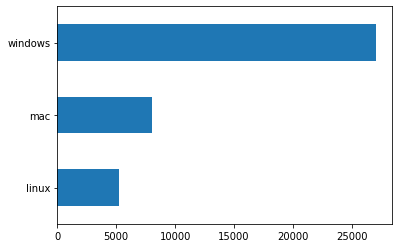

In [35]:
platforms_count = platforms_df.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
print(platforms_count)
platforms_count.sort_values().plot.barh()

Như vậy, với tổng số game là 27075 ở tập dữ liệu này thì:
- Gần như tất cả game đều hỗ trợ nền tảng **window**
- Gần 1/3 số game được phát hành trên **MAC**
- 1/5 số game được phát hành trên **Linux**

### Game nào có doanh thu cao nhất

Ở đây ta sẽ tính doanh thu của các game rồi chọn ra game có doanh thu cao nhất. Tuy nhiên ở tập dữ liệu này, cột **owners** tức người sỡ hữu chỉ là ước tính, có dạng `lower_bound:upper_bound`. Giả sử số người mua là trung bình của lower và upper thì doanh thu của game sẽ là revenue = (lower + upper) / 2 * price

Trong cột **owners** có dạng lower-upper nên em dùng regex để tách lấy 2 giá trị  
Tính cột doanh thu

In [15]:
# tạo cột doanh thu
games_df['revenue'] = games_df['owners']

# hàm tách giá trị từ owner rồi tính trung bình
def cal_average(owner): 
    arr = re.findall(r"\d+", owner)
    return np.mean([int(arr[0]), int(arr[1])])

# apply hàm ở trên vào cột revenue ta được cột revenue có giá trị là trung bình của lower và upper trong owners
games_df['revenue'] = games_df['revenue'].apply(cal_average)

# nhân cột revenue với cột price ta được doanh thu tính theo bảng Anh
games_df['revenue'] = games_df['revenue'] * games_df['price']

# tìm dòng có revenue lớn nhất
games_df.loc[games_df['revenue'] == max(games_df['revenue'])]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99,2.024250e+09


In [16]:
games_df.iloc[12836, 18]

2024250000.0

Vậy game có doanh thu cao nhất là **PLAYERUNKNOWN'S BATTLEGROUNDS** với doanh thu khoảng $2,024,250,000$ bảng Anh

### Game thể loại nào được chơi nhiều nhất

Tìm ra thể loại game được nhiều người chơi nhất

Tính tổng thời gian chơi trung bình của từng thể loại game (genres) để tìm ra thể loại được chơi nhiều nhất  

Tạo 1 dict chứa tên thể loại và tổng thời gian chơi trung bình  
Duyệt từng dòng để cập nhật tổng thời gian của thể loại tương ứng

In [20]:
genres_times = {} # dict chứa tên thể loại và thời gian chơi
for i in range(len(games_df)): # duyêt từng dòng
    # vì genres có dạng genres1;genres2;... nên split nó ra
    genres = games_df['genres'][i].split(';')
    for genre in genres:
        if genre not in genres_times:
            genres_times[genre] = games_df['average_playtime'][i]
        else:
            genres_times[genre] += games_df['average_playtime'][i]
            
# sort giảm dần theo value
genres_times = sorted(genres_times.items(), key = lambda item: item[1], reverse = True)

In [21]:
genres_times

[('Indie', 2191390),
 ('Action', 1714230),
 ('Adventure', 1521420),
 ('RPG', 1194086),
 ('Strategy', 1013354),
 ('Free to Play', 944762),
 ('Casual', 868603),
 ('Simulation', 801127),
 ('Massively Multiplayer', 524525),
 ('Early Access', 240163),
 ('Sports', 152715),
 ('Racing', 145634),
 ('Violent', 40586),
 ('Nudity', 26593),
 ('Gore', 25587),
 ('Sexual Content', 20677),
 ('Utilities', 16434),
 ('Design & Illustration', 9764),
 ('Animation & Modeling', 6963),
 ('Photo Editing', 5155),
 ('Web Publishing', 3814),
 ('Education', 2191),
 ('Game Development', 1972),
 ('Video Production', 1025),
 ('Software Training', 302),
 ('Audio Production', 65),
 ('Accounting', 0),
 ('Documentary', 0),
 ('Tutorial', 0)]

Vậy, Indie là thể loại game được chơi nhiều nhất

### Nhà phát triển game nào có nhiều thành tựu trong game nhất

Tìm ra nhà phát triển game có nhiều thành tựu nhất trong game

Cách xử lí tương tự câu trên

In [27]:
achievements_count = {}
for i in range(len(games_df['achievements'])):
    developer = games_df.loc[i, 'developer']
    if developer not in achievements_count:
        achievements_count[developer] = games_df.loc[i, 'achievements']
    else:
        achievements_count[developer] += games_df.loc[i, 'achievements']

In [28]:
# sort giảm dần theo value
achievements_count = sorted(achievements_count.items(), key = lambda item: item[1], reverse = True)

# giá trị đầu tiên trong mảng là giá trị lớn nhất
achievements_count[0]

('Ripknot Systems', 190196)

Vậy nhà phát triển Ripknot Systems có nhiều thành tựu trong game nhất (190196)

## 5 - NHÌN LẠI QUÁ TRÌNH THỰC HIỆN

## 6 - TÀI LIỆU THAM KHẢO

- [kaggle.com](https://www.kaggle.com/) để lấy dữ liệu
- Thư viện [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
- Các demo của thầy trong môn LTCKHDL